This notebook involves performing the following on the Airbnb Open dataset.
1. Data cleaning:
    - Drop unnecessaey columns
    - Drop duplicate rows
    - Make sure that all the columns have approriate data types
    - Remove outliers
2. Exploratory Data Analysis
    - Univariate Analysis
    - Multivariate Analysis
3. Hypothesis Testing
4. Final observations and conclusion

Tools used:
1. Pandas: for data manipulation
2. Matplotlib: for data visualization
3. Seaborn: for data visualization
4. Scipy: for statistics, hypothesis thesting

Downloading the dataset

The Airbnb Open Data can be downloaded from here - https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata
You can also explore more datasets from Airbnb Inside here - http://insideairbnb.com/explore/

## Loading the dataset

In [1]:
#import necessary librabies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Airbnb_Open_Data.csv")

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Cleaning

Let us see what the dataset has for us.

In [3]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
47014,26967168,Clean and cozy,88599219519,unconfirmed,Joy,Brooklyn,Crown Heights,40.67520,-73.94851,United States,...,$92,3.0,1.0,6/30/2019,1.00,4.0,2.0,360.0,NaN,NaN
65613,37239396,Amazing Greenwich Village w pool,76955393556,unconfirmed,Jeffrey,Manhattan,Greenwich Village,40.72952,-73.99410,United States,...,$143,7.0,18.0,5/2/2021,0.16,2.0,1.0,273.0,NaN,NaN
17847,10858234,Brooklyn Apartment,87140112505,verified,Thomas,Brooklyn,Greenpoint,40.72050,-73.94125,United States,...,$114,1.0,1.0,1/1/2018,0.05,5.0,1.0,0.0,NaN,NaN
65306,37069840,Williamsburg Loft Private Bedroom,2177694905,unconfirmed,Marissa,Brooklyn,Williamsburg,40.71650,-73.94719,United States,...,$210,4.0,6.0,6/17/2021,0.14,3.0,1.0,89.0,NaN,NaN
7208,4982314,NEW YORK CITY!!! LOCATION LOCATION!,79640138947,verified,Chris,Manhattan,Upper West Side,40.77311,-73.98606,United States,...,$218,3.0,124.0,6/24/2019,2.32,3.0,3.0,47.0,Free WiFi! * No smoking anywhere on property. ...,NaN


Let us look at how many missing and unique values each column has

In [4]:
for col in df.columns:
  missing_values=df[col].isnull().mean()*100
  unique=df[col].nunique()
  print(col, df[col].dtype, missing_values, unique)

id int64 0.0 102058
NAME object 0.24366709227185449 61281
host id int64 0.0 102057
host_identity_verified object 0.2816791586662638 2
host name object 0.39571535784949174 13190
neighbourhood group object 0.028265382703535125 7
neighbourhood object 0.015594693905398688 224
lat float64 0.007797346952699344 21991
long float64 0.007797346952699344 17774
country object 0.5185235723545064 1
country code object 0.12768155635045175 1
instant_bookable object 0.10234017875417889 2
cancellation_policy object 0.07407479605064377 3
room type object 0.0 4
Construction year float64 0.20857903098470743 20
price object 0.24074308716459225 1151
service fee object 0.2660844647608651 231
minimum nights float64 0.398639362956754 153
number of reviews float64 0.1783643115429975 476
last review object 15.490404389906335 2477
reviews per month float64 15.47675903273911 1016
review rate number float64 0.3177418883224983 5
calculated host listings count float64 0.3109192097388863 78
availability 365 float64 0.4

Observations:
1. The 'license' column has 99.9% of the data missing.
2. The 'country' column has only one category i.e., United States
3. The 'country code' and 'country' give same information.

So, let's drop these 3 columns

### Drop the unnecessary columns

In [5]:
df=df.drop(columns=['country','country code', 'license'])

### Check and drop duplicate rows

In [6]:
duplicate_rows=df.duplicated().sum()
print(duplicate_rows)

541


In [7]:
#drop the duplicate rows
df.drop_duplicates(inplace=True)

### Inspect column values

Now, Let's inspect the object columns (which can be of category type) and clean them if required.

In [8]:
for col in ["host_identity_verified", "neighbourhood group", "instant_bookable", "cancellation_policy", "room type"]:
    print(df[col].unique())

['unconfirmed' 'verified' nan]
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']
[False True nan]
['strict' 'moderate' 'flexible' nan]
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


Observation:
1. 'neighbourhood group' column has mispelled 'Manhattan' and 'Brooklyn' as 'manhatan' and 'brookln' respectively. 
So, let's correct the spellings.

In [9]:
df['neighbourhood group']=df['neighbourhood group'].apply(lambda x: 'Brooklyn' if x=='brookln' else 'Manhattan' if x=='manhatan' else x)
print(df['neighbourhood group'].unique())

['Brooklyn' 'Manhattan' 'Queens' nan 'Staten Island' 'Bronx']


Now, Let's inspect the numeric columns (which can be of 'int' and 'float' type) and clean them if required.

In [10]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101844.000000,101658.000000,101875.000000,86240.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2012.488090,8.126640,27.517948,1.375408,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,5.765838,30.616698,49.571744,1.748019,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,5.000000,31.000000,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


Observations:
   1. The minimum values in 'minimum nights' and 'availability 365' are negative, which is not possible. 
So, let's replace these negative values with NaN

In [11]:
df['minimum nights']=df['minimum nights'].apply(lambda x: pd.NA if x<0 else x)
df['availability 365']=df['availability 365'].apply(lambda x: pd.NA if x<0 else x)

### Assign appropriate datatype to each column

Based on the values in the dataframe. let's make the following changes to the datatypes of columns:
1. 'host_identity_verified', 'neighbourhood group', 'room type', 'cancellation_policy' must be categorical.
2. 'Construction year', 'minimum nights', 'number of reviews', 'calculated host listings count', 'review rate number', 'availability 365' must be integer.
3. 'price', 'service fee' must be float. Before that, since 'price' and 'service fee' are currency and have ',' and '$' in their values. We need to remove these to be able to convert to float.
4. 'instant_bookable' must be boolean.
5. 'last review' must be datetime.

In [12]:
df['host_identity_verified']=df['host_identity_verified'].astype('category')
df['neighbourhood group']=df['neighbourhood group'].astype('category')
df['room type']=df['room type'].astype('category')
df['cancellation_policy']=df['cancellation_policy'].astype('category')

df['last review']=pd.to_datetime(df['last review'])

df['Construction year']=df['Construction year'].astype("Int64")
df['minimum nights']=df['minimum nights'].astype("Int64")
df['number of reviews']=df['number of reviews'].astype("Int64")
df['calculated host listings count']=df['calculated host listings count'].astype("Int64")
df['review rate number']=df['review rate number'].astype("Int64")
df['availability 365']=df['availability 365'].astype("Int64")

df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype('float')
df['service fee']=df['service fee'].str.replace('$','')
df['service fee']=df['service fee'].str.replace(',','')
df['service fee']=df['service fee'].astype('float')

df['instant_bookable']=df['instant_bookable'].astype('bool')

/var/folders/8g/gxt2c1hx66j4cm7kqwktdcx40000gn/T/ipykernel_43013/1226361970.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace('$','')
/var/folders/8g/gxt2c1hx66j4cm7kqwktdcx40000gn/T/ipykernel_43013/1226361970.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee']=df['service fee'].str.replace('$','')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101808 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  category      
 4   host name                       101654 non-null  object        
 5   neighbourhood group             102029 non-null  category      
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   instant_bookable                102058 non-null  bool          
 10  cancellation_policy             101982 non-null  categor

### Remove Outliers

Remove outliers
Check for the outliers by plotting a boxplot and remove if any.

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


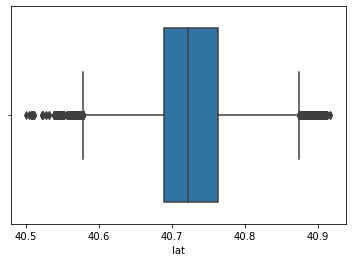

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


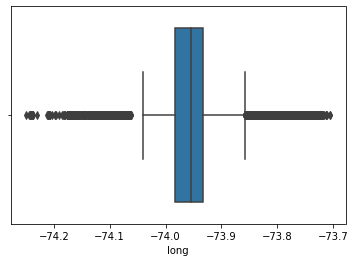

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


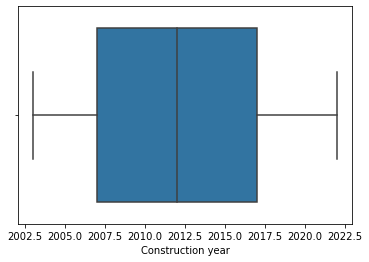

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


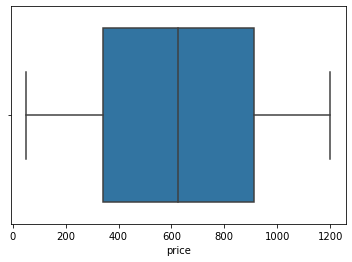

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


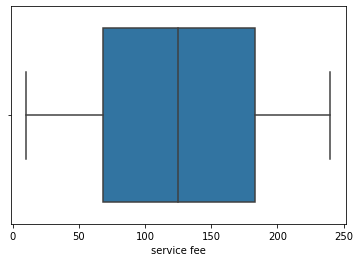

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


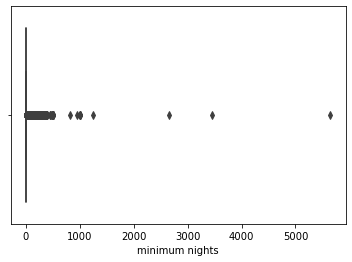

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


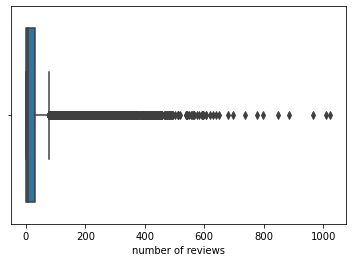

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


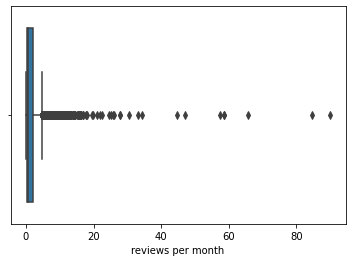

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


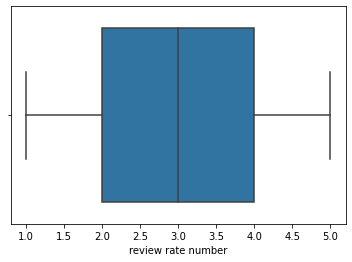

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


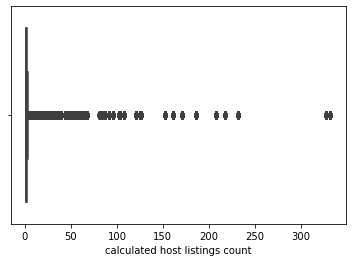

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


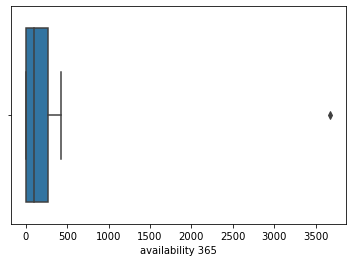

In [14]:
for col in df.columns:
  if pd.Int64Dtype.is_dtype(df[col]) or df[col].dtype=='float':
        plt.figure()
        sns.boxplot(df[col])
        plt.show()

Observations:
1. In columns like - 'lat', 'long', 'number of reviews', 'reviews per month', 'calculated host listings count', it makes sense to have values that are large. 
2. But, it doesn't make sense to have outliers in 'minimum nights', 'availability 365' beacuse the values cannot be as large as 5645 and 3677 respectively.
So, lets remove the outliers from 'minimum nights' and 'availability 365'

In [15]:
def remove_outlier(df_temp, cols):
  for col_name in cols:
    q1 = df_temp[col_name].quantile(0.25)
    q3 = df_temp[col_name].quantile(0.75)
    iqr = q3-q1 
    minimum  = q1-1.5*iqr
    maximum = q3+1.5*iqr
    df_temp = df_temp.loc[(df_temp[col_name] > minimum) & (df_temp[col_name] < maximum)]
  return df_temp
df=remove_outlier(df, ['minimum nights', 'availability 365'])

## Exploratory Data Analysis

### Number of listings in each location (neighbourhood group)

(0.0, 100.0, 0.0, 100.0)

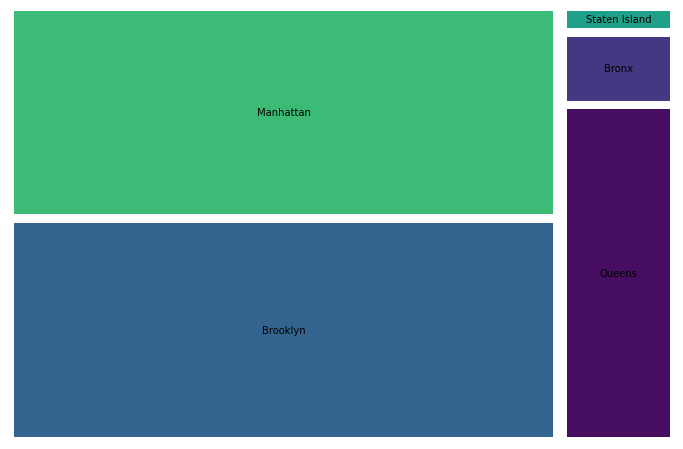

In [16]:
# sns.countplot(df['neighbourhood group'])
import squarify
plt.figure(figsize=(12,8))
plot_data = df['neighbourhood group'].value_counts()
squarify.plot(sizes=plot_data.values,label=plot_data.index, pad=2)
plt.axis('off')

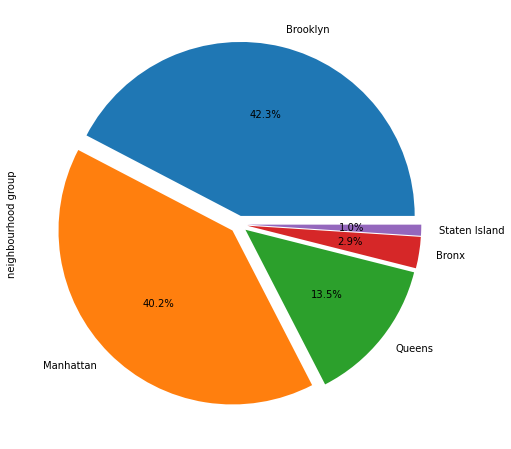

In [17]:
plt.figure(figsize=(12,8))
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
df['neighbourhood group'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=explode)
plt.show()

**Observations:**
- More than 80% of the listings are found in Manhattan and Brooklyn.
- The highest number of listings are present in Brooklyn and Manhattan, followed by Queens.
- Staten Island consists has only 1% of the entire listings.

### Price distribution in each neighbourhood group

<AxesSubplot:xlabel='neighbourhood group', ylabel='price'>

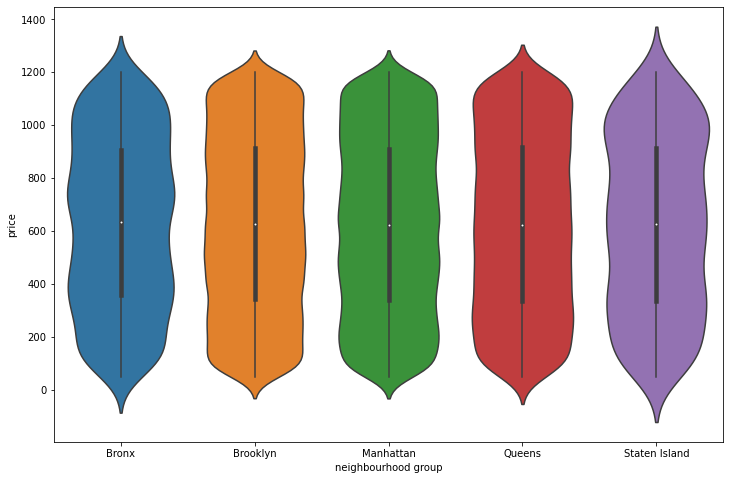

In [18]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x="neighbourhood group", y="price")

**Observations:**

### Number of listings for each type of room

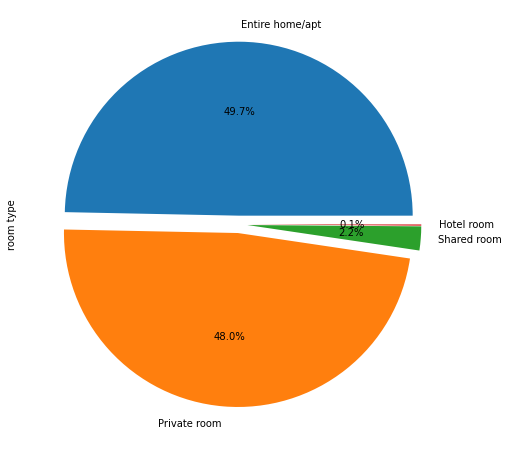

In [19]:
plt.figure(figsize=(12,8))
explode = (0.05, 0.05, 0.05, 0.05)
df['room type'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=explode)
plt.show()

**Observations:**
- About 98% of the listings are available to rent the entire home/apt and a private room. 
- Shared room have just 2.2% listings and the least are hotel room with a mere 0.1%.

### What share of the listings have highest and lowest ratings?

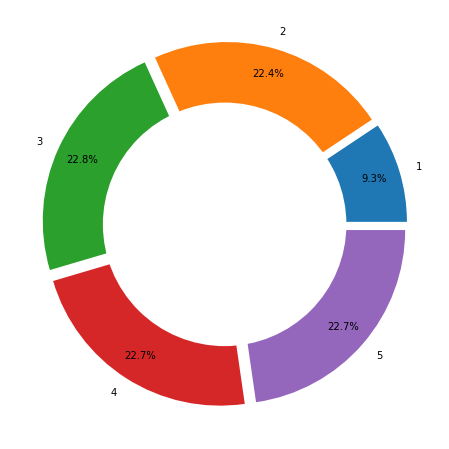

In [20]:
plt.figure(figsize=(12,8))
plot_data=df.groupby('review rate number', as_index=False)['id'].count()
plt.pie(plot_data['id'], labels=plot_data['review rate number'], autopct='%1.1f%%', pctdistance=0.85, explode = (0.05, 0.05, 0.05, 0.05, 0.05))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

**Observations:**
- About 45% of the listings are in the range of good and the best and about the same percentage of them are in average and below average range ratings.
- Only 10% of the listings are given the least rating.

### distribution of different ratings in each neighbourhood group

<AxesSubplot:title={'center':'Staten Island'}, ylabel='id'>

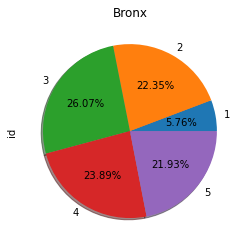

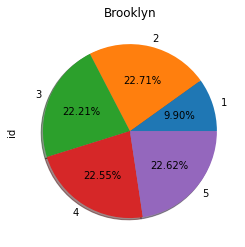

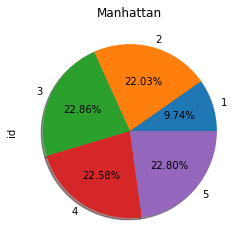

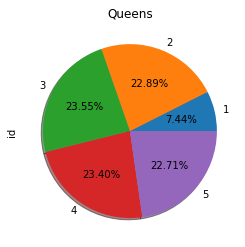

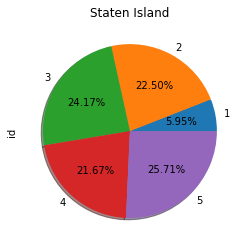

In [21]:
plot_data=df.groupby(by=['neighbourhood group','review rate number'], as_index=False)['id'].count()
plot_data_bronx=plot_data[plot_data['neighbourhood group']=='Bronx'][['review rate number','id']].set_index('review rate number')
plot_data_bronx.plot(kind='pie',title='Bronx',x='review rate number',y='id', autopct='%.2f%%', legend=False, shadow=True)
plot_data_brooklyn=plot_data[plot_data['neighbourhood group']=='Brooklyn'][['review rate number','id']].set_index('review rate number')
plot_data_brooklyn.plot(kind='pie',title='Brooklyn',x='review rate number',y='id', autopct='%.2f%%', legend=False, shadow=True)
plot_data_man=plot_data[plot_data['neighbourhood group']=='Manhattan'][['review rate number','id']].set_index('review rate number')
plot_data_man.plot(kind='pie',title='Manhattan',x='review rate number',y='id', autopct='%.2f%%', legend=False, shadow=True)
plot_data_queens=plot_data[plot_data['neighbourhood group']=='Queens'][['review rate number','id']].set_index('review rate number')
plot_data_queens.plot(kind='pie',title='Queens',x='review rate number',y='id', autopct='%.2f%%', legend=False, shadow=True)
plot_data_staten=plot_data[plot_data['neighbourhood group']=='Staten Island'][['review rate number','id']].set_index('review rate number')
plot_data_staten.plot(kind='pie',title='Staten Island',x='review rate number',y='id', autopct='%.2f%%', legend=False, shadow=True)

**Observations:**
- Overall each neighbourhood has almost the same number of listings which are rated at 2,3,4 and 5(around 23% each).
- Bronx has relatively more number of listings with 3 rating, while staten island has more listings with rating 5.
- All the neighbourhoods have relatively less number of listings which are rated at 1.


### Relation between price and service fee

<AxesSubplot:xlabel='price'>

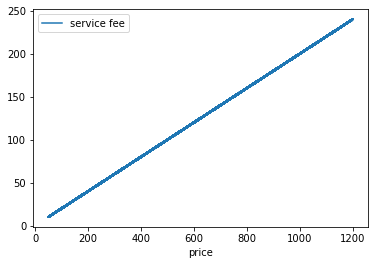

In [22]:
df.plot(kind='line', x="price", y="service fee")

**Observations:**
- According to the line plot, the service fee seems to have a linear relationship with the price which is about 20.8% of the listed price.

### Relaton between price and numer of reviews

/Users/jeshmithagunuganti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


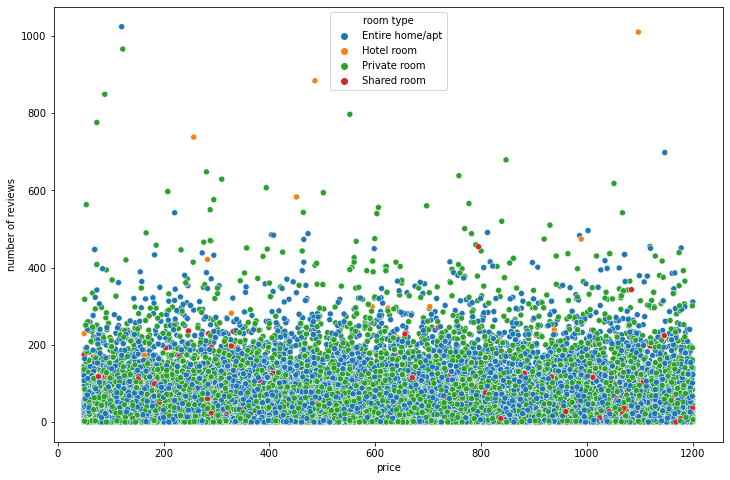

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['price'],df['number of reviews'], hue=df['room type'])
plt.show()

**Observations:**

### how expensive is each neighbourhood?

<AxesSubplot:xlabel='neighbourhood group'>

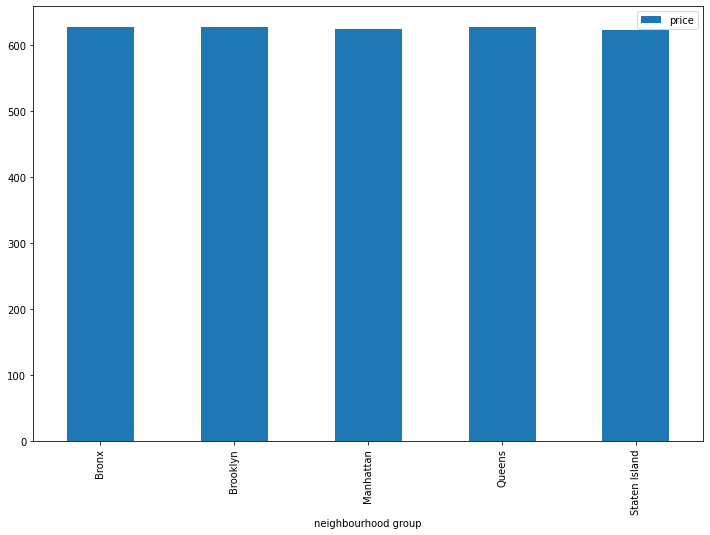

In [24]:
plot_data=df.groupby("neighbourhood group", as_index=False)["price"].mean()
plot_data.plot(kind='bar', x="neighbourhood group", y="price", figsize=(12,8))

**Observations:**
- As per the given dataset, average pricing of the listings of all the neighbourhoods is almost the same, that is slightly greater than $600.

### what is average number of minimum nights based on neighbourhood group?

<AxesSubplot:ylabel='neighbourhood group'>

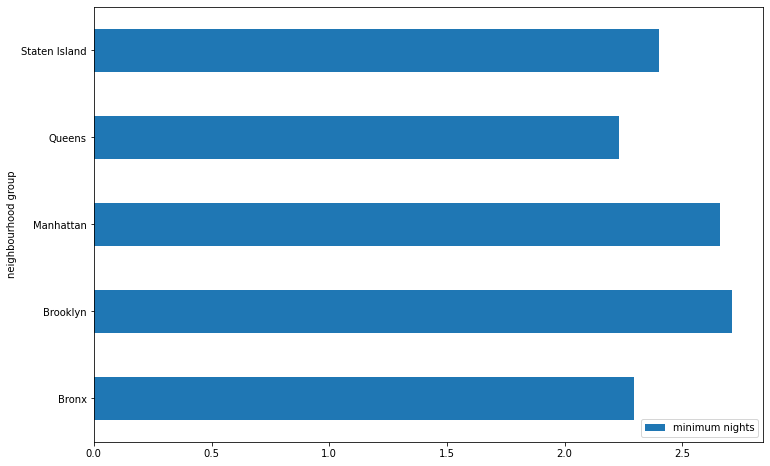

In [25]:
plot_data=df.groupby("neighbourhood group", as_index=False)["minimum nights"].mean()
plot_data.plot(kind='barh', x="neighbourhood group", y="minimum nights", figsize=(12,8))

**Observations:**
- The minimum stay for the listings in all the neighbourhoods is more than 2 days.

### average price for each room type

<AxesSubplot:xlabel='room type', ylabel='price'>

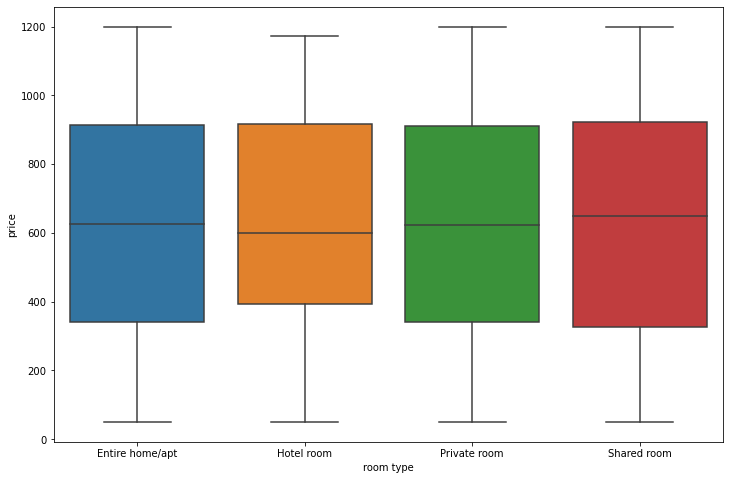

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='room type', y='price')

**Observations:**
- The average price for each of the room types is about the same i.e $600.
- The Highest listing price for each of the room types is also the same, whereas the least price listed for hotel room is slightly higher than the other room types.

### Overall Distribution of ratings

<AxesSubplot:ylabel='review rate number'>

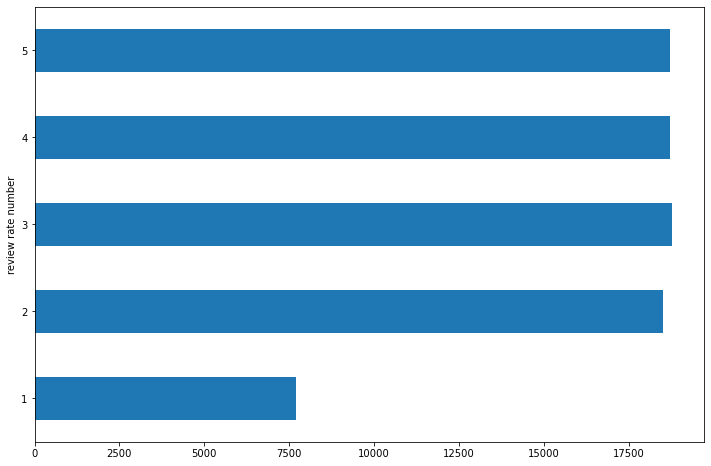

In [27]:
plot_data=df.groupby('review rate number')['id'].count()
plot_data.plot(kind='barh', figsize=(12,8))

**Observations:**
- The listings have equal number of ratings with 2,3,4 and 5.

### does price vary based on the year of its construction?

<AxesSubplot:xlabel='Construction year'>

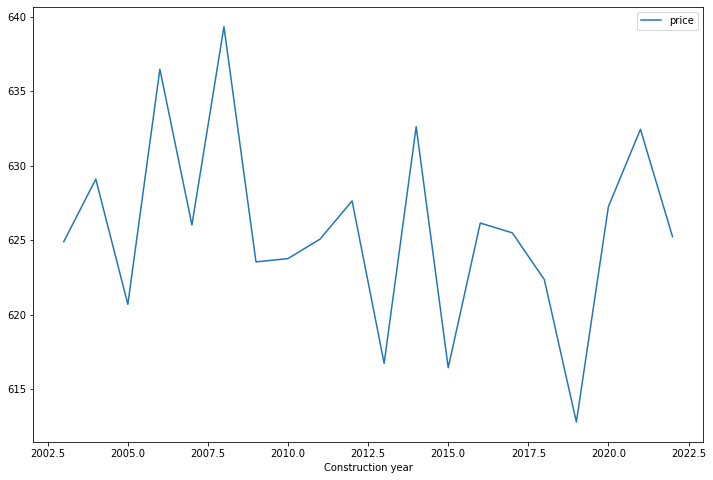

In [28]:
plot_data=df.groupby("Construction year", as_index=False)["price"].mean()
plot_data.plot(kind='line', x="Construction year", y="price", figsize=(12,8))

**Observations:**
- Yes, the prices of the listings seem to vary with year in which they are constructed. The listings which are constructed between 2005 and 2008 are priced high, while the ones which are constructed between 2018 and 2019 are priced low.

### number of constructions made each year

<AxesSubplot:xlabel='Construction year'>

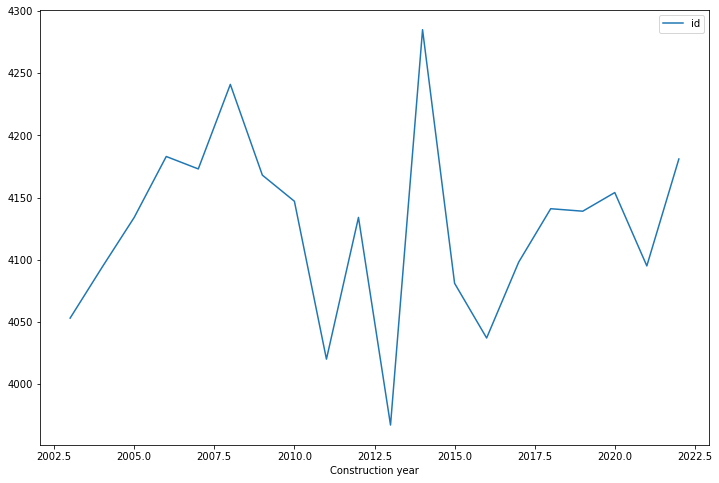

In [29]:
plot_data=df.groupby('Construction year', as_index=False)["id"].count()
plot_data.plot(kind='line', x="Construction year", y='id', figsize=(12,8))

Observations:
- As per the data, the listings have more number of properties constructed 2013 and 2014.

### Number of constructions made each year at each neighbourhood group

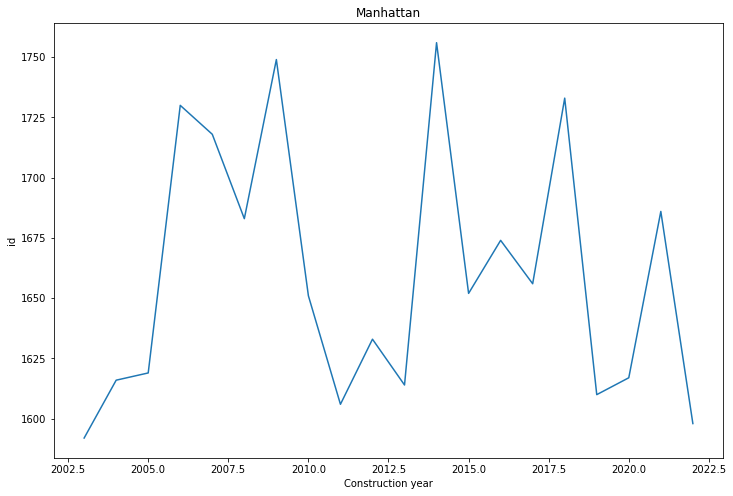

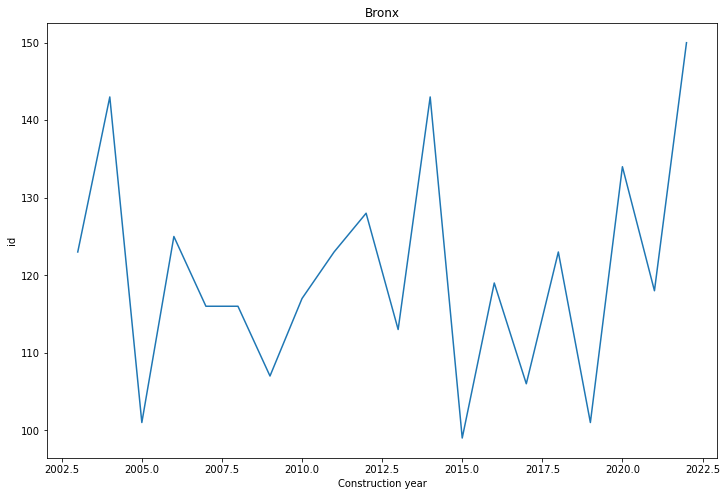

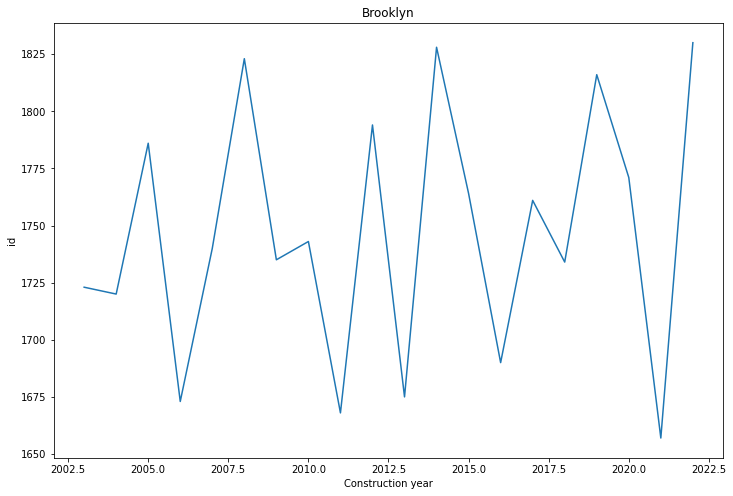

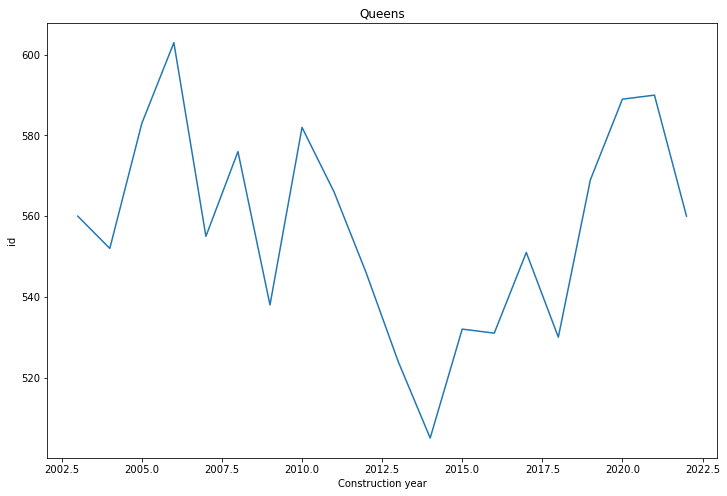

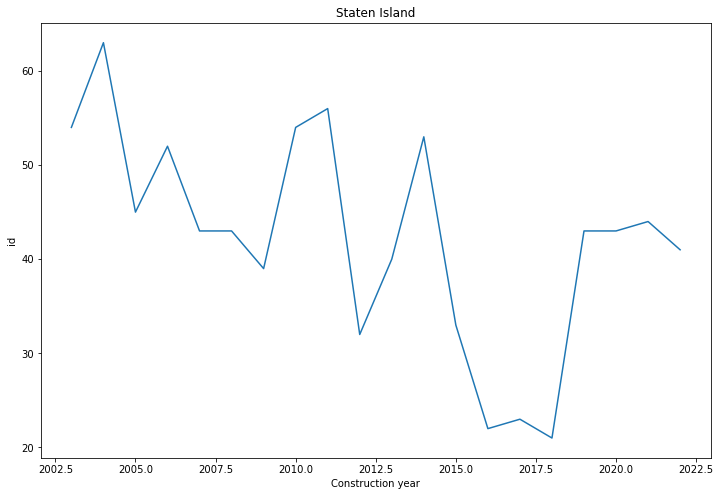

In [50]:
plt.figure(figsize=(12,8))
plot_data=df[df['neighbourhood group']=='Manhattan'].groupby(by=['Construction year'], as_index=False)['id'].count()
sns.lineplot(data=plot_data, x='Construction year', y='id')
plt.title('Manhattan')
plt.show()

plt.figure(figsize=(12,8))
plot_data=df[df['neighbourhood group']=='Bronx'].groupby(by=['Construction year'], as_index=False)['id'].count()
sns.lineplot(data=plot_data, x='Construction year', y='id')
plt.title('Bronx')
plt.show()

plt.figure(figsize=(12,8))
plot_data=df[df['neighbourhood group']=='Brooklyn'].groupby(by=['Construction year'], as_index=False)['id'].count()
sns.lineplot(data=plot_data, x='Construction year', y='id')
plt.title('Brooklyn')
plt.show()

plt.figure(figsize=(12,8))
plot_data=df[df['neighbourhood group']=='Queens'].groupby(by=['Construction year'], as_index=False)['id'].count()
sns.lineplot(data=plot_data, x='Construction year', y='id')
plt.title('Queens')
plt.show()

plt.figure(figsize=(12,8))
plot_data=df[df['neighbourhood group']=='Staten Island'].groupby(by=['Construction year'], as_index=False)['id'].count()
sns.lineplot(data=plot_data, x='Construction year', y='id')
plt.title('Staten Island')
plt.show()

**Observations:**

### Below is a pairplot that summarizes the relation between all the numeric variables

<Figure size 864x576 with 0 Axes>

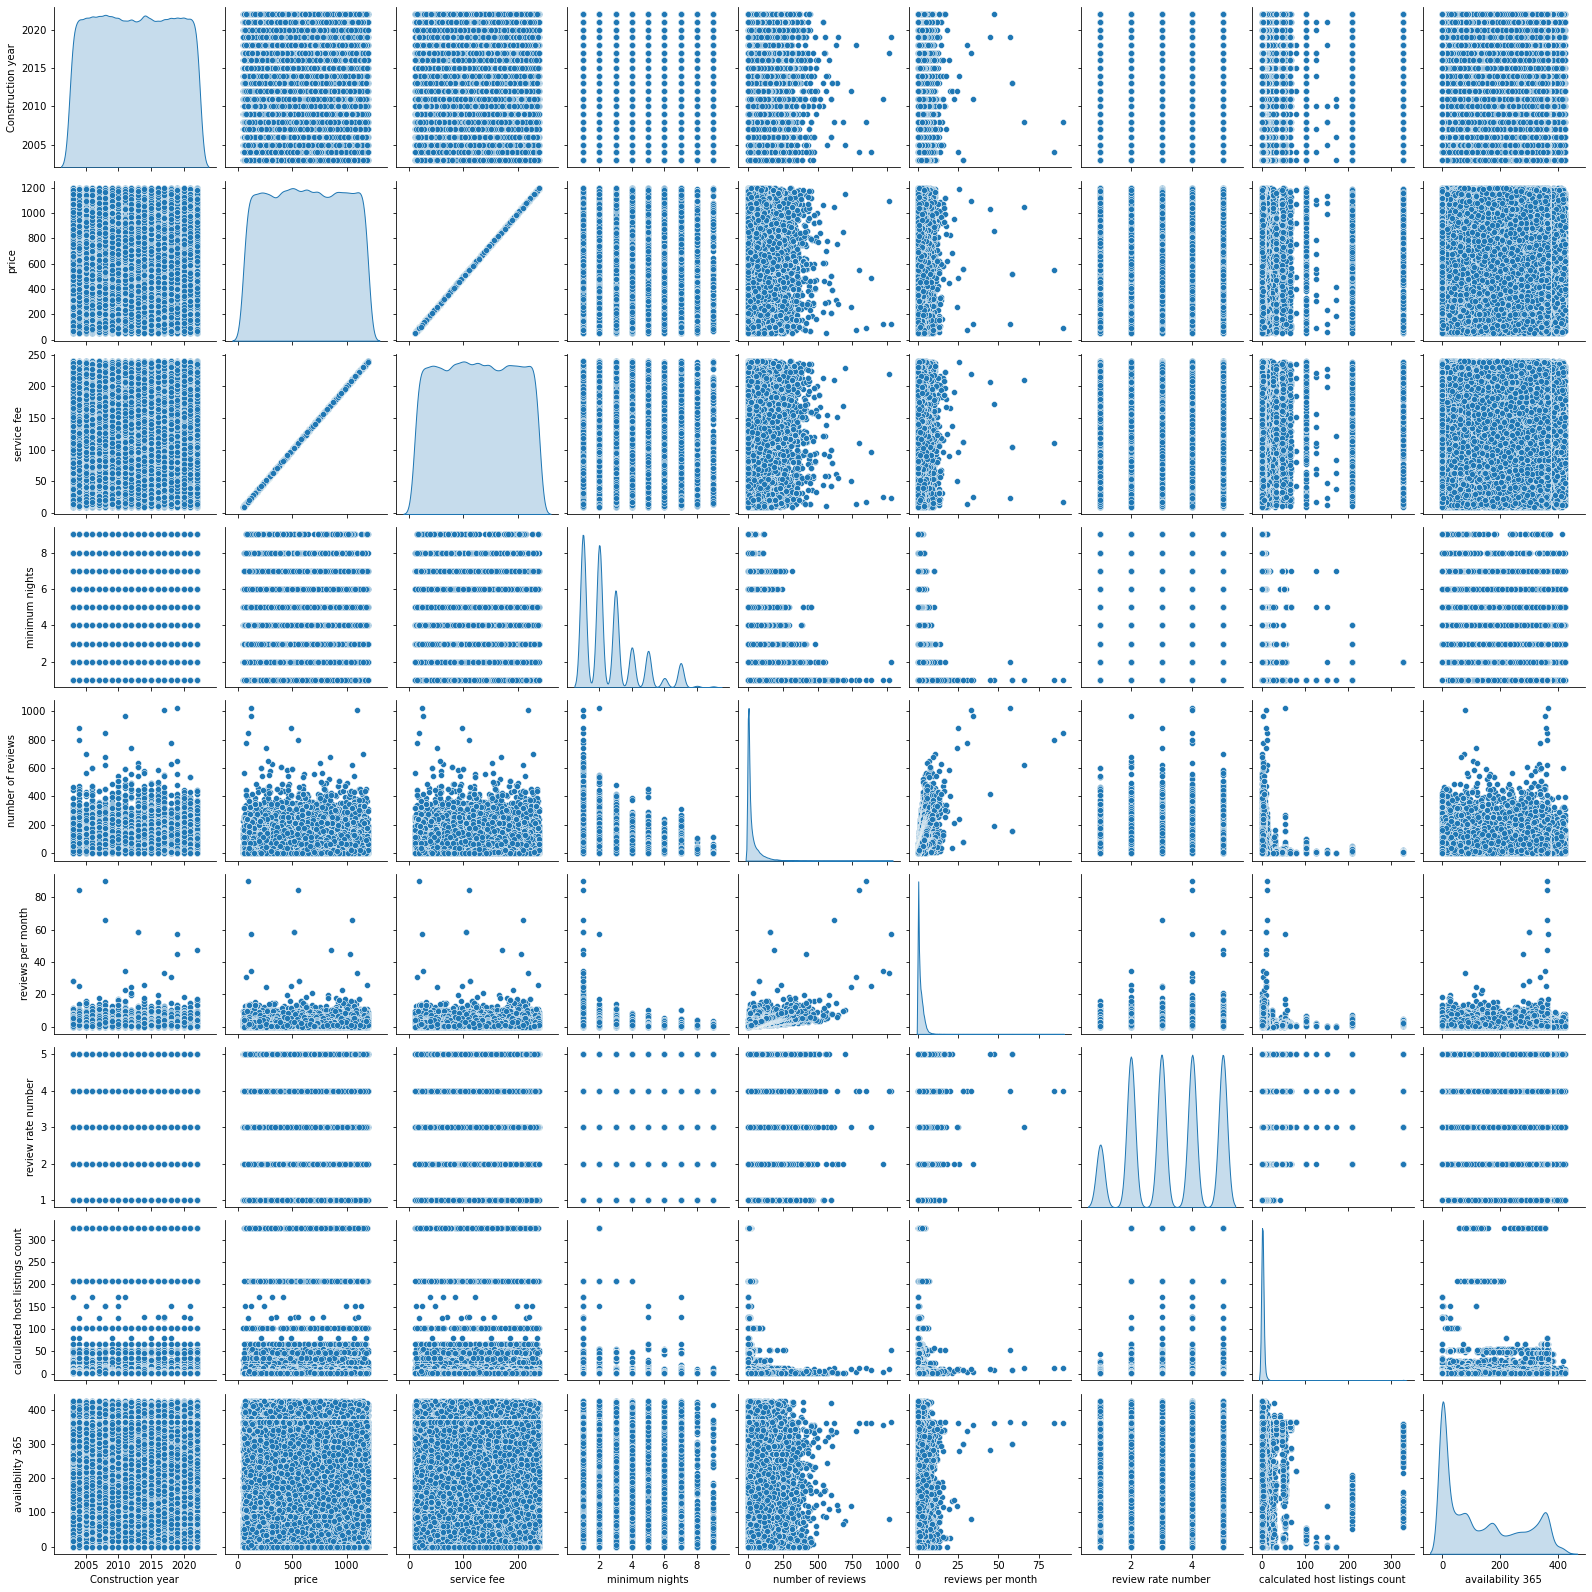

In [31]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df, vars=['Construction year', 'price','service fee', 'minimum nights', 'number of reviews', 'reviews per month','review rate number','calculated host listings count', 'availability 365'], kind='scatter', diag_kind='kde')
plt.show()

### Relation between the 'host_identity_verified' and 'instant_bookable'

<AxesSubplot:xlabel='instant_bookable', ylabel='host_identity_verified'>

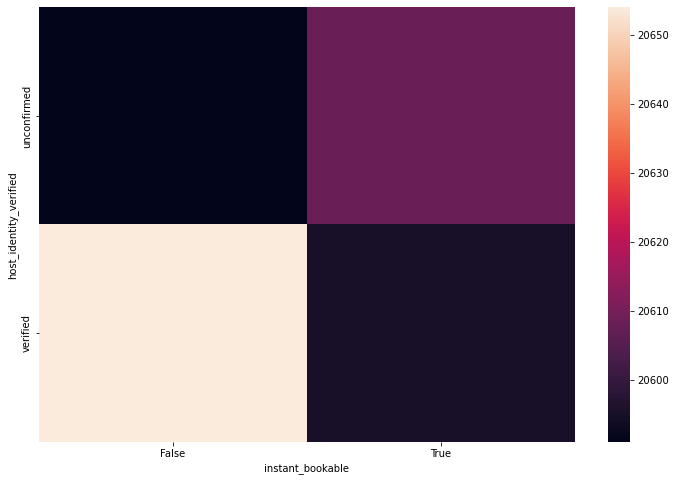

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(df['host_identity_verified'], df['instant_bookable']))

**Observations:**

### Relation between the 'host_identity_verified' and 'cancellation_policy'

<AxesSubplot:xlabel='cancellation_policy', ylabel='host_identity_verified'>

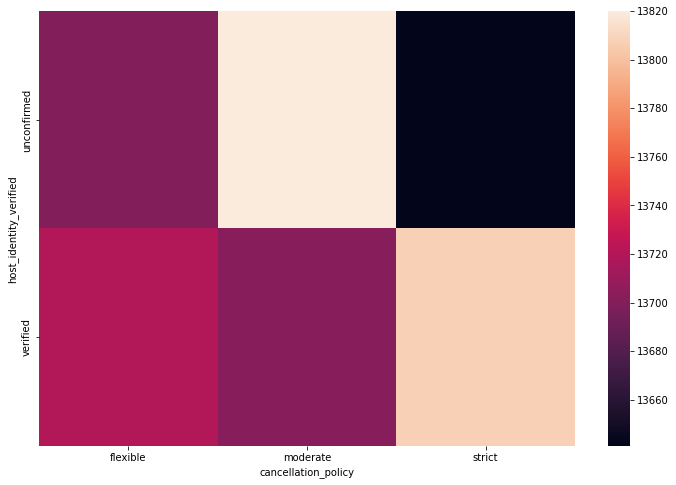

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(df['host_identity_verified'], df['cancellation_policy']))

**Observations:**

### Relation between the 'instant_bookable' and 'cancellation_policy'

<AxesSubplot:xlabel='cancellation_policy', ylabel='instant_bookable'>

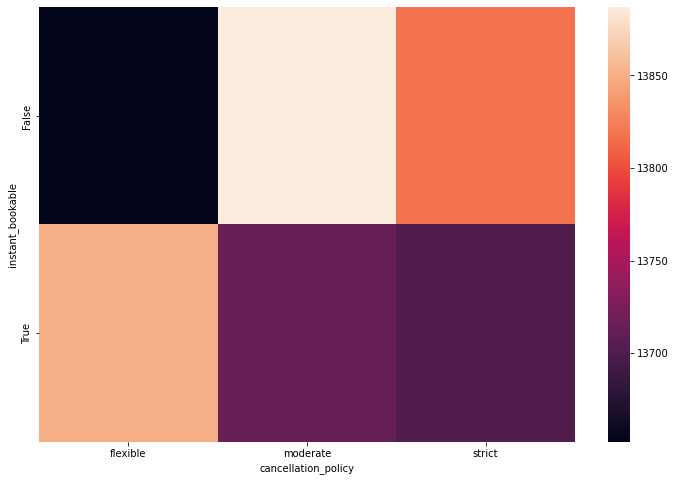

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(df['instant_bookable'], df['cancellation_policy']))

**Observations:**

### Does price vary based on if the unit is instantly bookable or not?

<AxesSubplot:xlabel='instant_bookable'>

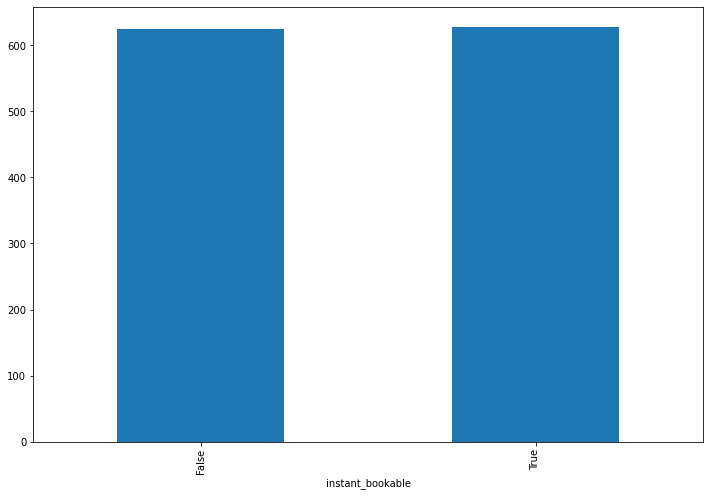

In [35]:
plt.figure(figsize=(12,8))
plot_data=df.groupby('instant_bookable')['price'].mean()
plot_data.plot(kind='bar', x='instant_bookable', y='price')

**Observations:**

### what does house rules mainly mention about?

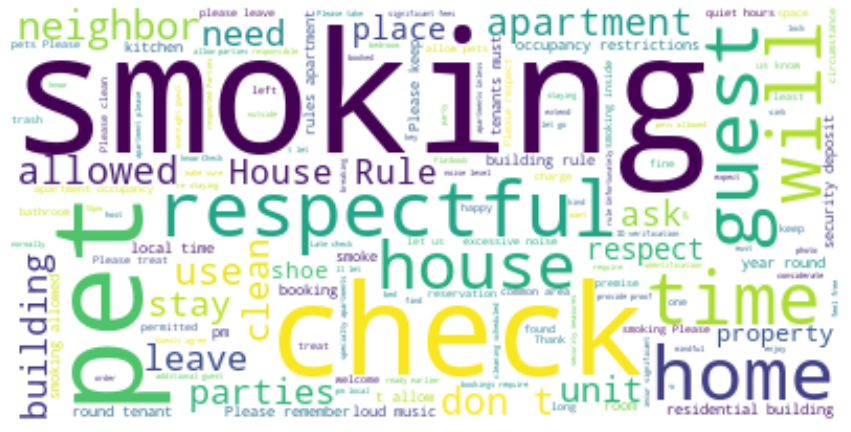

In [36]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import numpy as np

text = " ".join(i for i in df['house_rules'] if not pd.isnull(i))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observations:**

### How are listings usually described?

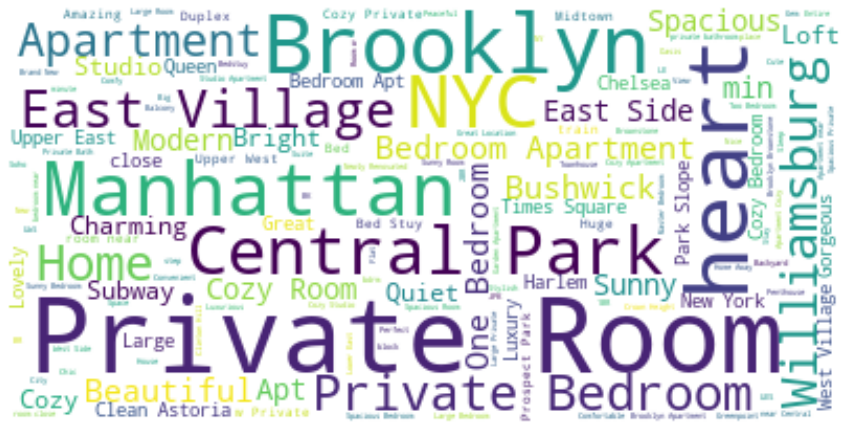

In [37]:
text = " ".join(i for i in df['NAME'] if not pd.isnull(i))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observations:**

### Which room type is more listed in each neighbourhood group

<AxesSubplot:xlabel='room type', ylabel='id'>

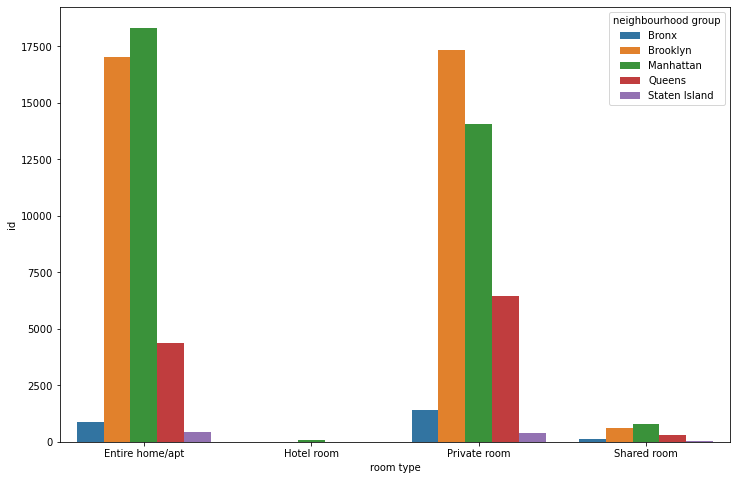

In [38]:
plt.figure(figsize=(12,8))
plot_data=df.groupby(['neighbourhood group', 'room type'], as_index=False)['id'].count()
sns.barplot(data=plot_data, x='room type', hue='neighbourhood group', y='id')

**Observations:**

### Which room type is more pricy in each neighbourhood group

<AxesSubplot:xlabel='room type', ylabel='price'>

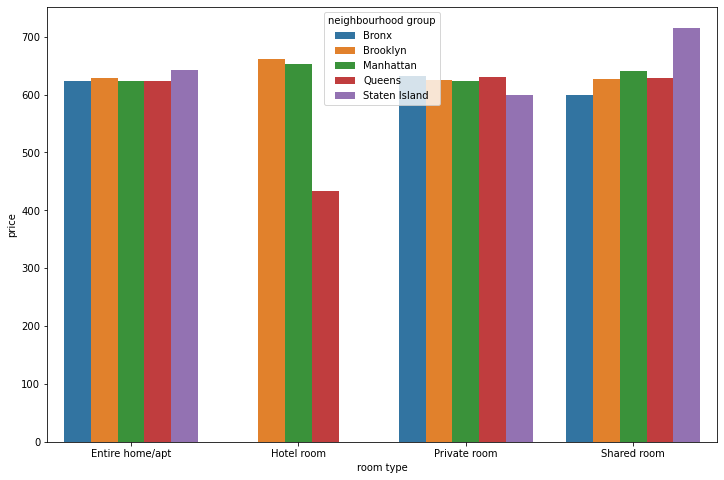

In [39]:
plt.figure(figsize=(12,8))
plot_data=df.groupby(['neighbourhood group', 'room type'], as_index=False)['price'].mean()
sns.barplot(data=plot_data, x='room type', hue='neighbourhood group', y='price')

**Observations:**

### Map view of all the listings

<AxesSubplot:xlabel='lat', ylabel='long'>

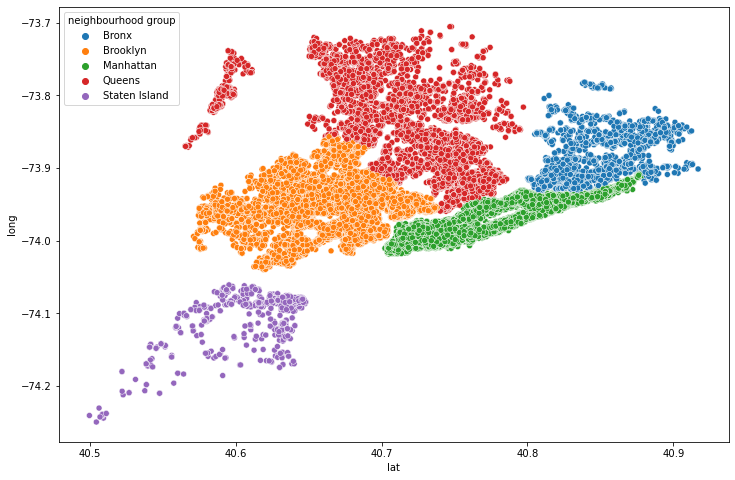

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='lat', y='long', hue='neighbourhood group')

**Observations:**

### Map view of listings visualizing their availability for coming year

<AxesSubplot:xlabel='lat', ylabel='long'>

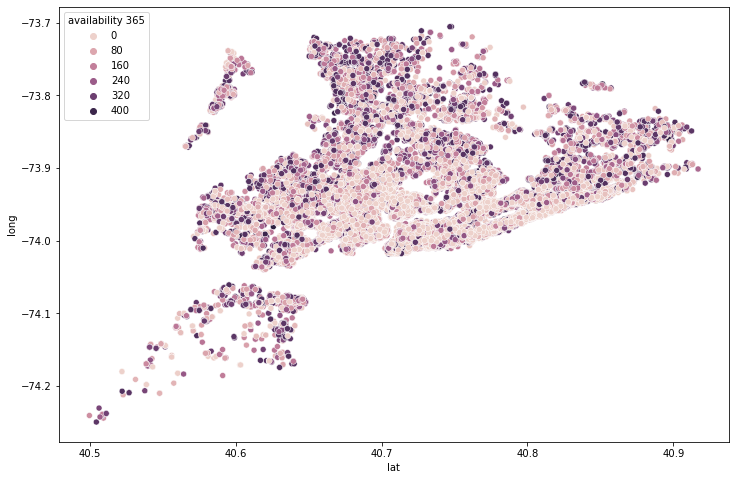

In [41]:
plt.figure(figsize=(12,8))
df['availability 365']=df['availability 365'].astype('float')
sns.scatterplot(data=df, x='lat', y='long', hue='availability 365')

**Observations:**

## Hypothesis Testing

### Test 1: Does the cancellation policy depend on whether the listing is instantly bookable or not?

we can do this using contingency table, but is it signficant enough to say that they are independent or dependent? this can be answered by performing hypothesis testing

**Defining hypothesis:**
1. **Null hypothesis (H0):** cancellation_policy is independent of instant_bookable
2. **Alternative hypothesis (H1):** cancellation_policy depends on instant_bookable

**Test: Chi-Squared test**, for testing the relationship between two categorical variables (cancellation_policy and instant_bookable)

In [42]:
contingency_table=pd.crosstab(df['instant_bookable'], df['cancellation_policy'])

In [43]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Fail to reject H0 - instant_bookable and cancellation_policy are independent')
else:
    print('Reject H0 - instant_bookable and cancellation_policy are dependent')

stat=2.905, p=0.234
Fail to reject H0 - instant_bookable and cancellation_policy are independent


#### **Observation:** cancellation policy doesn't significantly depend upon whether the listing is instantly bookable or not.

### Test 2: Does price depend on the review rate number

**Defining hypothesis:**
1. **Null hypothesis (H0):** Price is independent of review rate number
2. **Alternative hypothesis (H1):** Price depends upon review rate number

**Test: Correlation test**, for testing the relationship between two numerical variables

In [44]:
#Spearman Rank Correlation
from scipy.stats import spearmanr

df_price_rate=df.dropna(how='any', subset=['price','review rate number' ])[['price','review rate number']]
stat, p = spearmanr(df_price_rate['price'], df_price_rate['review rate number'])

print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Fail to reject H0 - price and review rate number are independent')
else:
    print('Reject H0 - price and review rate number are dependent')

stat=-0.005, p=0.138769
Fail to reject H0 - price and review rate number are independent


In [45]:
#pearson correlation
from scipy.stats import pearsonr

stat, p = pearsonr(df_price_rate['price'], df_price_rate['review rate number'])

print('stat=%.3f, p=%3f' % (stat, p))
if p > 0.05:
    print('Fail to reject H0 - price and review rate number are independent')
else:
    print('Reject H0 - price and review rate number are dependent')

stat=-0.005, p=0.138012
Fail to reject H0 - price and review rate number are independent


#### **Observation:** price doesn't significantly depend upon review rate number.

### Final Observations:
